In [1]:
#Importing Modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
import scipy.integrate as integrate
import scipy.special as special
import sympy as sp

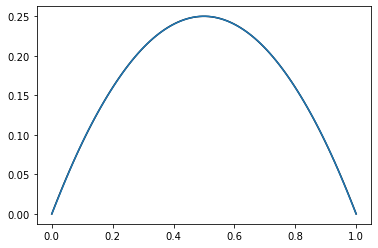

In [2]:
x = np.linspace(0,1, 100)
y_1 = x*(1-x)
plt.plot(x, y_1,'k-' )

N = 8
def a_n(n):
    return (2*np.pi*n*np.sin(np.pi*n)+4*np.cos(np.pi*n)-4)/(-1*(np.pi**3)*(n**3))
def back(x, n):
    return np.sin(n*np.pi*x)
def f_n(x, n):
    return a_n(n) * back(x, n)


def f_N(x, N):
    f = np.zeros_like(x)
    for i in range(1, N+1):
        f += f_n(x, i)
    return f

plt.plot(x, f_N(x,10))

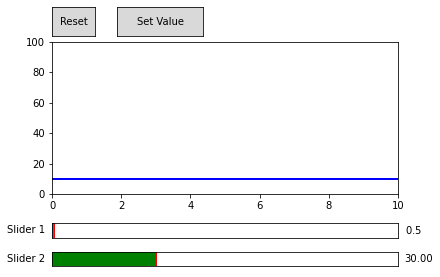

In [3]:
# sliders
from matplotlib.widgets import Slider, Button, RadioButtons
x = list(range(0,11))
y = [10]*11
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, bottom=0.35)
p, = plt.plot(x,y, linewidth=2, color='b')

plt.axis([0,10,0,100])

axSlider1 = plt.axes([0.1, 0.2, 0.8, 0.05])
slider1= Slider(axSlider1, 'Slider 1', valmin=0, valmax=100)

axSlider2 = plt.axes([0.1, 0.1, 0.8, 0.05])
slider2 = Slider(ax=axSlider2, label='Slider 2', valmin=0, valmax=100, valinit=30, valfmt='%1.2f', valstep=10, 
                 closedmax=False, color='g') 

def val_update(val):
    yval = slider2.val
    p.set_ydata(yval)
    plt.draw()
    
cid2 = slider2.on_changed(val_update)
# slider2.disconnect(cid2)

axButton1 = plt.axes([.1, .9, .1, .1])
btn1 = Button(axButton1, 'Reset')

axButton2 = plt.axes([0.25, .9, .2, .1])
btn2 = Button(axButton2, 'Set Value')

def setVal(val):
    slider2.set_val(50)
    
btn2.on_clicked(setVal)

def resetSlider(event):
    slider1.reset()
    slider2.reset()
btn1.on_clicked(resetSlider)

plt.show()

In [4]:
%matplotlib inline

#heat plot map interactive
from ipywidgets import interactive, interact, fixed, interact_manual
import seaborn as sb 

x = np.linspace(0,10,100)

y = np.linspace(0,10,100)
x,y = np.meshgrid(x,y)

def f(A,B, C, D):
    return D*np.sin(C*np.sqrt(A**2 + B**2))

#we want to toggle C and D to sweep over

# new function 

def plotting(C, D):
    z = f(x,y, C, D)
    ax = sb.heatmap(z,xticklabels= 10, yticklabels=10, vmin= -5, vmax=5, cmap='Blues_r')
    ax.invert_yaxis()

interactive_plot = interactive(plotting, C=(0,10,1), D = (1,5,1))
interactive_plot



interactive(children=(IntSlider(value=5, description='C', max=10), IntSlider(value=3, description='D', max=5, …

In [5]:
#heat plot map interactive
from ipywidgets import interactive
import seaborn as sb 

x = np.linspace(0,10,100)

t = np.linspace(0,10,100)

x,t = np.meshgrid(x,t)

def f(x, t, C):
    return C*np.exp(-(x-t)**2)

#we want to toggle C and D to sweep over

# new function 
def plotting(C, t):
    z = f(x, t, C)
    ax = sb.heatmap(z,xticklabels= 10, yticklabels=10, vmin= 0, vmax=5, cmap='Blues_r')
    ax.invert_yaxis()
    plt.title('u(x,t)')
    plt.xlabel('t')
    plt.ylabel('x position')

interactive_plot = interactive(plotting, C=(0,10,.1), t = (0,10,.1))
interactive_plot

interactive(children=(FloatSlider(value=5.0, description='C', max=10.0), FloatSlider(value=5.0, description='t…

In [6]:
from scipy.interpolate import UnivariateSpline
import ipywidgets as widgets


def f(x):
    plt.plot(np.arange(0,10), x*np.arange(0,10))
    plt.ylim(-38,30)
    
interact(f, x=1) # x will change the slope

interactive(children=(IntSlider(value=1, description='x', max=3, min=-1), Output()), _dom_classes=('widget-int…

<function __main__.f(x)>

In [7]:
def f(x):
    plt.plot(np.arange(0,10), x*np.arange(0,10))
    plt.ylim(-30,30)
    
interact(f, x=(0,10, .5)) # x will change the slope on an interval of maxes and mins

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.5), Output()), _dom_classes=('w…

<function __main__.f(x)>

In [8]:
#automatically choose approriate widget
rands = np.random.rand(100)

def g(x):
    if x:
        plt.plot(rands, 'b')
        
    else:
        plt.plot(rands, 'r')
        
interact(g, x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.g(x)>

In [9]:
# interact as decorator 

@interact(title='Title')
def f(title):
    plt.title(title)

interactive(children=(Text(value='Title', description='title'), Output()), _dom_classes=('widget-interact',))

In [10]:
# multiple Widgets

def f(a,b):
    plt.plot(np.arange(0,10), a*np.power(np.arange(0,10), b ))
    plt.title('Power Law: $x = ay^b$')
interact(f, a=1, b=3)

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), IntSlider(value=3, description='b', …

<function __main__.f(a, b)>

In [11]:
# fixed value 

def f(a,b):
    plt.plot(np.arange(0,10), a*np.power(np.arange(0,10), b ))
    plt.title('Power Law: $x = ay^b$')
    
interact(f,a=fixed(2), b=(0,10))

interactive(children=(IntSlider(value=5, description='b', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.f(a, b)>

In [12]:
# Dropdowns 

def f(color):
    plt.plot(np.arange(0,10), np.power(np.arange(0,10),5), c=color)
    plt.title("Power Law $y=ax^b$")
colors = ["red", 'green', 'blue', 'pink']

interact(f, color=colors)

interactive(children=(Dropdown(description='color', options=('red', 'green', 'blue', 'pink'), value='red'), Ou…

<function __main__.f(color)>

In [13]:
# dropdowns with dictionaries 

def f(b):
    plt.plot(np.arange(0,10), np.power(np.arange(0,10), b))
    plt.title("Power Law $y=ax^b$")

powers = {'one':1, 'two':2, 'three':3}

interact(f, b=powers)

interactive(children=(Dropdown(description='b', options={'one': 1, 'two': 2, 'three': 3}, value=1), Output()),…

<function __main__.f(b)>